<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
#file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [4]:
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65457.000000,3.374400e+04,29664.000000,29330.000000,29399.000000,29417.000000,29456.000000,29454.000000,29462.000000,29462.000000,29456.000000,29451.000000,2.343700e+04,29131.000000
mean,32714.493591,2.963490e+145,11.466323,18.578998,7.520604,10.059485,24.339971,22.964277,20.279127,16.167837,10.953481,9.953618,8.615893e+04,6.934915
std,18892.431636,5.443794e+147,9.168205,25.965347,18.421094,21.831924,27.088870,27.017634,26.110706,24.844177,22.904463,21.775070,1.867532e+05,2.088356
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16354.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32716.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49076.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,1.080000e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [5]:
# Identify missing values for all columns
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_values)

Missing values per column:
AINextMuch less integrated    64309
AINextLess integrated         63102
AINextNo change               52955
AINextMuch more integrated    52018
EmbeddedAdmired               48718
                              ...  
MainBranch                        0
Age                               0
Employment                        0
Check                             0
ResponseId                        0
Length: 114, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



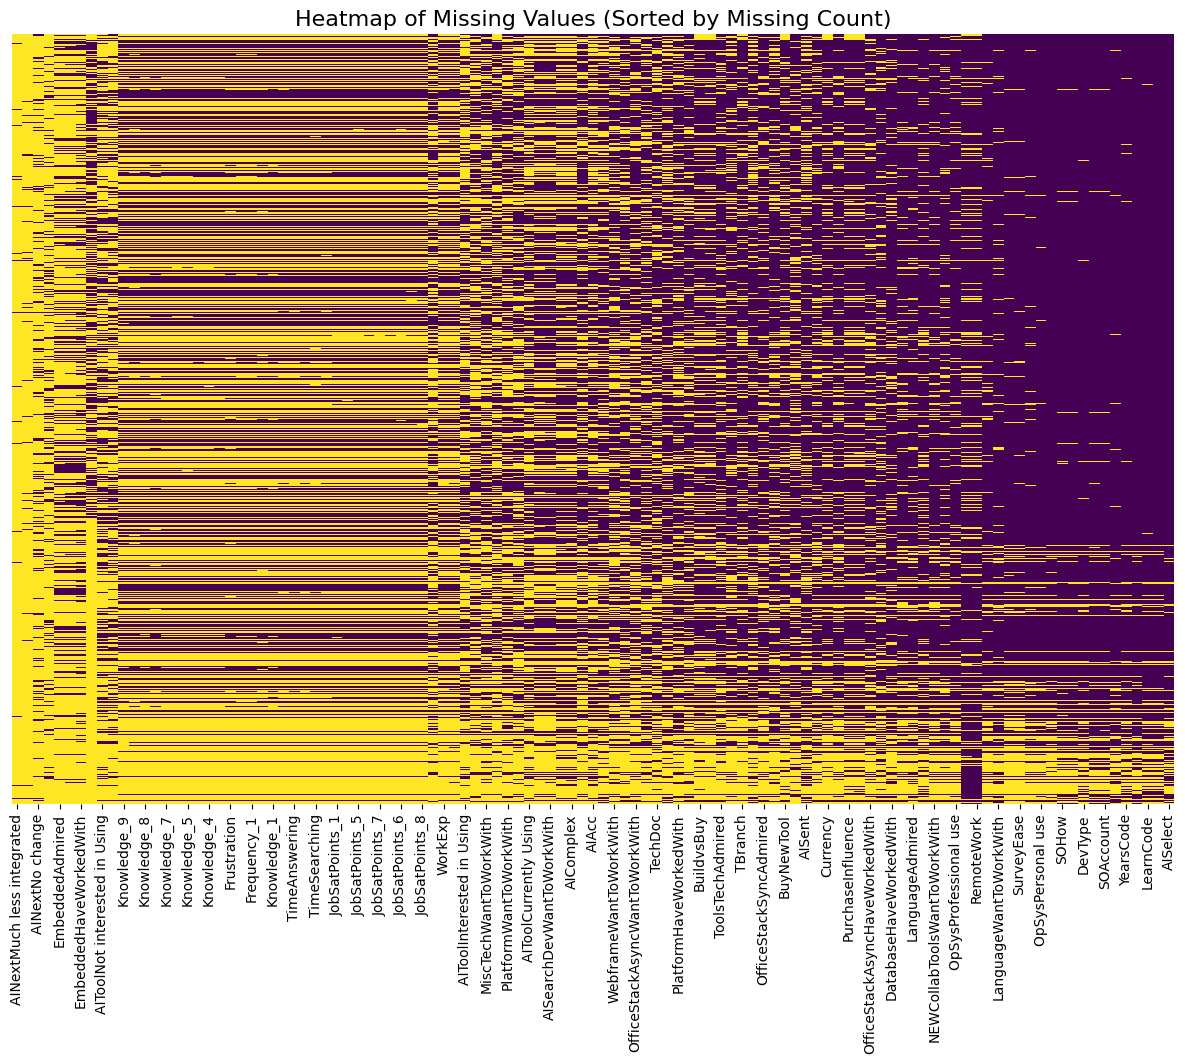

In [21]:

# Set a threshold to filter out columns with very few missing values
missing_threshold = 1000  # Adjust as needed
missing_values = df.isnull().sum()

# Select and sort columns with more than the threshold of missing values
sorted_cols = missing_values[missing_values > missing_threshold].sort_values(ascending=False).index

# Plot heatmap if there are columns exceeding the threshold
if len(sorted_cols) > 0:
    plt.figure(figsize=(15, 10))
    sns.heatmap(df[sorted_cols].isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Heatmap of Missing Values (Sorted by Missing Count)', fontsize=16)
    plt.show()
else:
    print("No columns exceed the missing value threshold.")


##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [25]:
# Count missing rows for the 'SurveyLength' column
missing_survey_length = df['SurveyLength'].isnull().sum()
print(f"Number of missing rows in SurveyLength' column: {missing_survey_length}")


Number of missing rows in SurveyLength' column: 9259


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [26]:
# Find the most frequent value in 'Employment' column
majority_value = df['SurveyLength'].mode()[0]
print(f"The most frequent value in 'SurveyLength' column is: {majority_value}")


The most frequent value in 'SurveyLength' column is: Appropriate in length


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [27]:
# Impute missing values in 'SurveyLength' with the most frequent value
majority_value = df['SurveyLength'].mode()[0]
df['SurveyLength'] = df['SurveyLength'].fillna(majority_value)


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


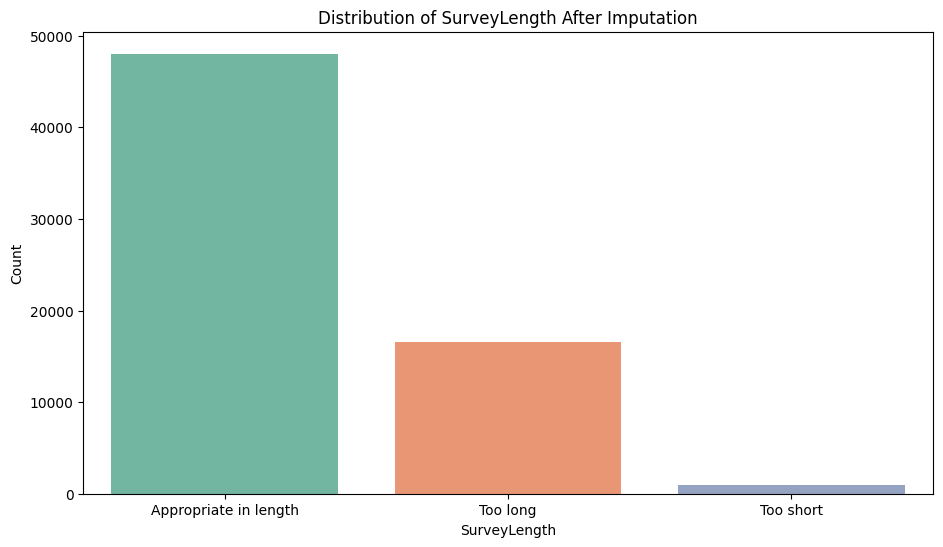

In [28]:
# Visualize distribution after imputation
plt.figure(figsize=(10, 6))
sns.countplot(x='SurveyLength', data=df, hue='SurveyLength', palette='Set2', legend=False)
plt.title('Distribution of SurveyLength After Imputation')
plt.xlabel('SurveyLength')
plt.ylabel('Count')
plt.subplots_adjust(left=0.1, right=0.95)
plt.show()


### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
